John Kenney- jfk150030, Matt Brown - meb180001

Project Selection: California Housing Prices

In [95]:
#importing the libraries
import numpy as np  
import pandas as pd 


# visualize dataset
import seaborn as sns 
import matplotlib.pyplot as plt

# used to standardize/normalize attributes
from sklearn.preprocessing import StandardScaler

# linear model w/ metrics
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# used to split training and test data
from sklearn.model_selection import train_test_split


Set Parameters here for model

In [96]:
#loss = The loss function to be used. The possible values are ‘squared_loss’, ‘huber’, ‘epsilon_insensitive’, or ‘squared_epsilon_insensitive’
#penalty = ‘l2’, ‘l1’, ‘elasticnet’
#alpha = Constant that multiplies the regularization term
#learning rate = 'constant’, ‘optimal’, ‘invscaling’, ‘adaptive’
#eta0 = The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules. The default value is 0.01.
loss_func = 'squared_loss'
pen_func = 'l1'
pen_alph = 0.0001
M_iter = 150
lr = 'adaptive'
ini_lr = 0.1

Importing and preprocessing the data


In [97]:
# To download file from GitHub public url
raw_url = "https://raw.githubusercontent.com/mattebrown95/CS_4372/main/housing_Assignment1.csv"

# import the dataset into a variable
housing_dataset = pd.read_csv(raw_url)
# verify data read into pandas df
# print(type(housing_dataset))

# look at the dataset
#housing_dataset.head(10)

# understand the dataset
# housing_dataset.describe()
# returns 20640 rows * 10 columns
# print(housing_dataset.shape)

# look at column names
# print(housing_dataset.columns)

Checking for missing data values. Examine data for consistency.

In [98]:
# Drop rows that have one or more null values
housing_dataset = housing_dataset.dropna()
# verify ZERO nulls present
print(housing_dataset.isnull().values.sum())


0


In [99]:
max(housing_dataset['median_house_value'])

500001

We see that 500001 are outliers may have capped median at this number for some reason

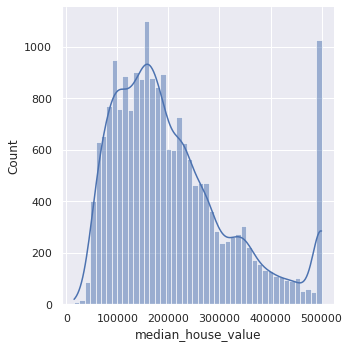

In [100]:
sns.displot(housing_dataset, x="median_house_value", kde=True)

In [101]:
housing_dataset = housing_dataset[housing_dataset['median_house_value'] < max(housing_dataset['median_house_value'])]

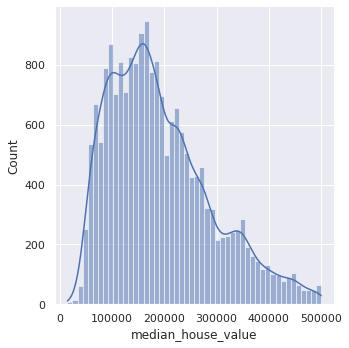

In [102]:
sns.displot(housing_dataset, x="median_house_value", kde=True)

In [103]:
X = housing_dataset
cols_to_drop = ['longitude', 'latitude']
X = X.drop(labels=cols_to_drop, axis=1)


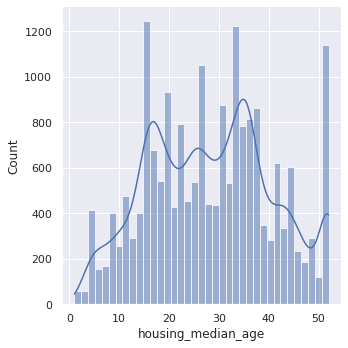

In [104]:
#cols_to_drop = [ 'total_bedrooms', 'population', 'median_house_value', 'ocean_proximity']
#temp = X.drop(labels=cols_to_drop,axis = 1)
sns.displot(housing_dataset, x="housing_median_age", kde=True)
#ax = sns.displot(data=temp)

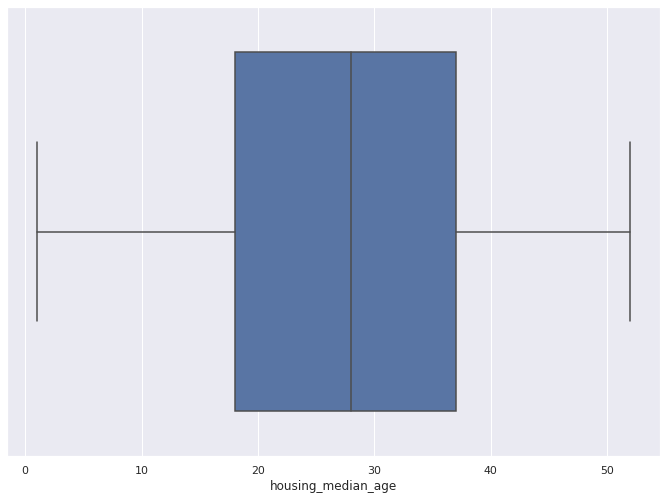

In [105]:
sns.boxplot(x=housing_dataset["housing_median_age"])

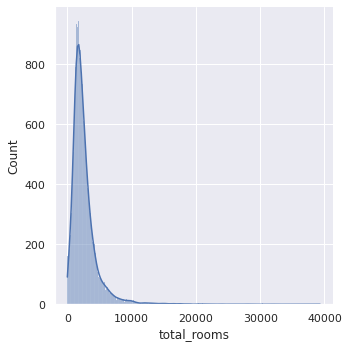

In [106]:
sns.displot(housing_dataset, x="total_rooms", kde=True)

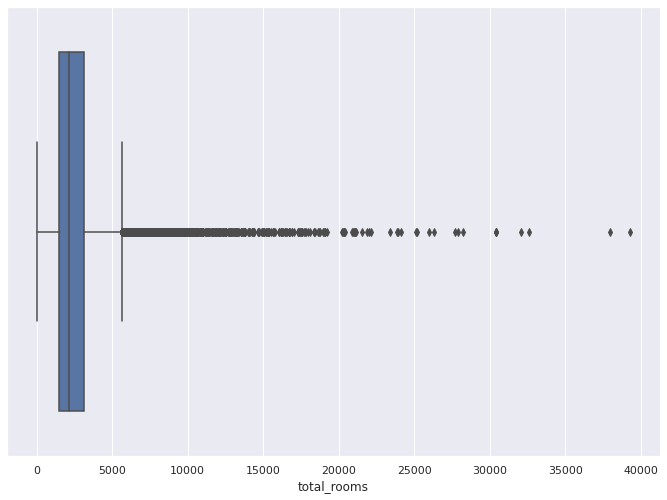

In [107]:
sns.boxplot(x=housing_dataset["total_rooms"])

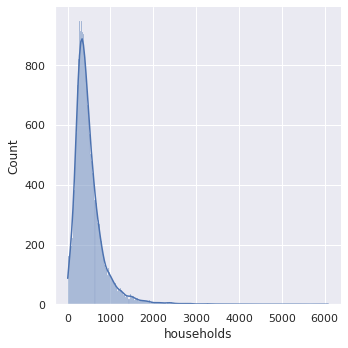

In [108]:
sns.displot(housing_dataset, x="households", kde=True)

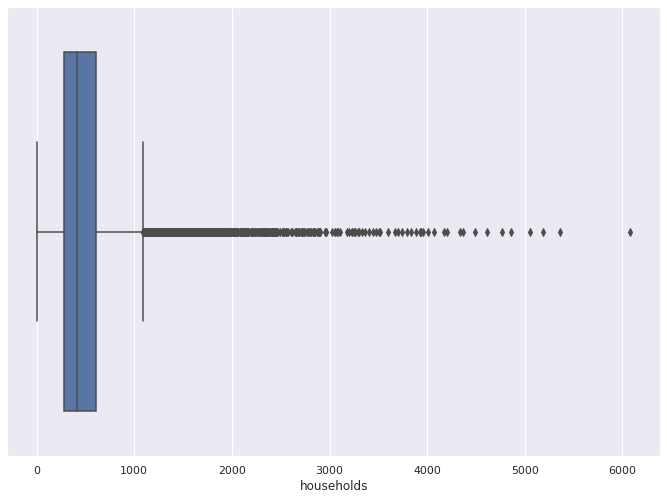

In [109]:
sns.boxplot(x=housing_dataset["households"])

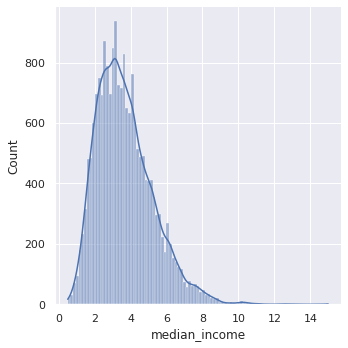

In [110]:
sns.displot(housing_dataset, x="median_income", kde=True)

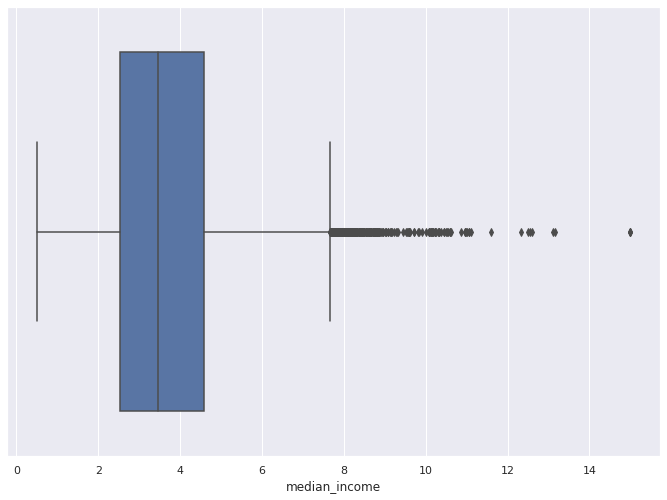

In [111]:
sns.boxplot(x=housing_dataset["median_income"])

Assign predictors and response variables

Examine attributes and target variables. Deal with categorical variables (ocean proximity).

5
<1H OCEAN     8505
INLAND        6469
NEAR OCEAN    2419
NEAR BAY      2077
ISLAND           5
Name: ocean_proximity, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


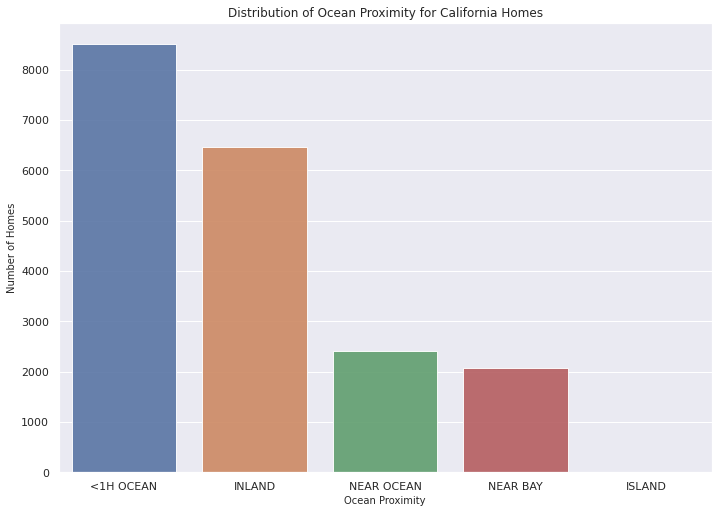

In [112]:
# determine # of distinct values for ocean_proximity
print(X['ocean_proximity'].value_counts().count())

# determine values of each variable for ocean_proximity
print(X['ocean_proximity'].value_counts())

# visualize the data values for ocean_proximity
ocean_proximity_count = X['ocean_proximity'].value_counts()
sns.set(style="darkgrid")
sns.barplot(ocean_proximity_count.index, ocean_proximity_count.values, alpha=0.9)
plt.title('Distribution of Ocean Proximity for California Homes')
plt.xlabel('Ocean Proximity', fontsize=10)
plt.ylabel('Number of Homes', fontsize=10)
plt.show()

In [113]:
#print(X.dtypes)

In [114]:
X = pd.get_dummies(X, dtype=float)
# These will not be helpful in predicting the value of a home for our assignment
# there are only 5 houses out of 20000 in this category

X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,129.0,322,126,8.3252,452600,0.0,0.0,0.0,1.0,0.0
1,21,7099,1106.0,2401,1138,8.3014,358500,0.0,0.0,0.0,1.0,0.0
2,52,1467,190.0,496,177,7.2574,352100,0.0,0.0,0.0,1.0,0.0
3,52,1274,235.0,558,219,5.6431,341300,0.0,0.0,0.0,1.0,0.0
4,52,1627,280.0,565,259,3.8462,342200,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100,0.0,1.0,0.0,0.0,0.0
20636,18,697,150.0,356,114,2.5568,77100,0.0,1.0,0.0,0.0,0.0
20637,17,2254,485.0,1007,433,1.7000,92300,0.0,1.0,0.0,0.0,0.0
20638,18,1860,409.0,741,349,1.8672,84700,0.0,1.0,0.0,0.0,0.0


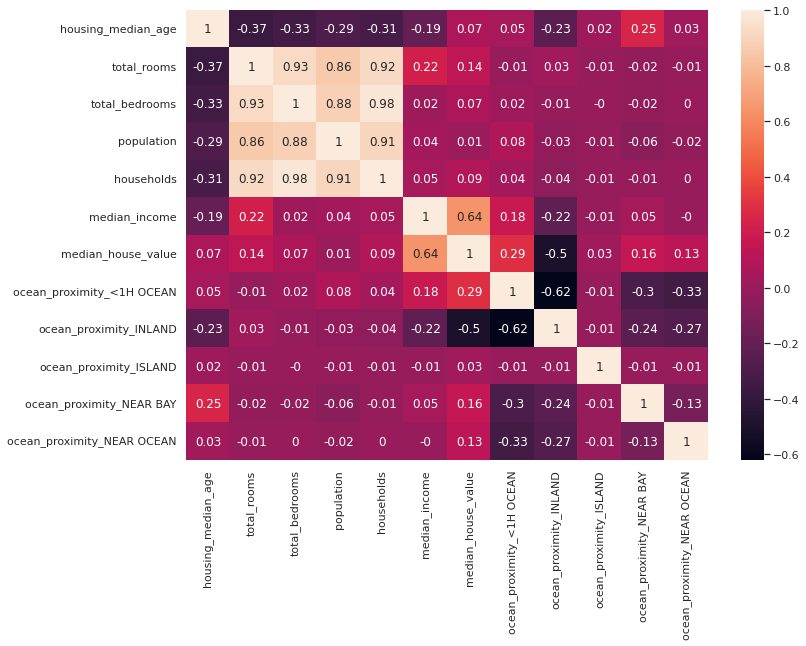

In [115]:
# understand the relationship b/t the variables
correlation_matrix = X.corr().round(2)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

In [116]:
#print(X.keys())

In [117]:
cols_to_drop = [ 'total_bedrooms', 'population', 'median_house_value', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
X = X.drop(labels=cols_to_drop, axis=1)
column_names = X.keys().tolist()
#type(column_names)
#print(X.keys())

In [118]:
# drop response for X
#X = X.drop(labels=['median_house_value'], axis=1)
#print(X)
#print(X.shape)
#X = np.array(X)
#print(X)
#print(X.shape)
# response is home value
Y = housing_dataset['median_house_value']
#print(Y)
#print(Y.shape)
#Y = np.array(Y).reshape(len(Y))
#print(Y)
#print(Y.shape)

Standardize the variables, change column names to represent original predictors

In [119]:
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X.values))
X.columns = column_names
# print(X.columns)


Split data into training and test parts. Training: 80%, Test: 20%

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
#Y_train = np.array(Y_train).reshape((len(Y_train)))
#Y_test = np.array(Y_test).reshape((len(Y_test)))
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(15580, 5)
(3895, 5)
(15580,)
(3895,)


Construct model and tune parameters.

In [121]:

reg = SGDRegressor(loss = loss_func,penalty= pen_func,alpha =pen_alph, max_iter = M_iter,random_state=1,learning_rate = lr,eta0=ini_lr)
reg.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_loss', max_iter=150,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=1,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [122]:

reg.coef_

array([ 12431.44100599, -13644.02641356,  21082.16446623,  60785.87168356,
       -31071.86371341])

Determine best way to interpret this value.

In [123]:
reg.intercept_


array([192352.9732206])

Pair the column names with their corresponding weights, see which variables have the most power in predicting the median home value.

In [124]:
labeled_weights = dict(zip(X.columns,reg.coef_))
print(labeled_weights)

import operator

max_key = max(labeled_weights.items(), key=operator.itemgetter(1))[0]
max_value = max(labeled_weights.items(), key=operator.itemgetter(1))[1]
min_key = min(labeled_weights.items(), key=operator.itemgetter(1))[0]
min_value = min(labeled_weights.items(), key=operator.itemgetter(1))[1]
print("\nMost correlated:", max_key, max_value)
print("\nLeast correlated:", min_key, min_value)

{'housing_median_age': 12431.441005985747, 'total_rooms': -13644.026413561383, 'households': 21082.164466225353, 'median_income': 60785.87168355857, 'ocean_proximity_INLAND': -31071.8637134103}

Most correlated: median_income 60785.87168355857

Least correlated: ocean_proximity_INLAND -31071.8637134103


Trying the statsmodels API for ordinary least squares.
Look at the relationship between income and home value.

In [125]:
y_train_predict = reg.predict(X_train)
rmse_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2_train = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))

The model performance for training set
--------------------------------------
RMSE is 64135.60722897425
R2 score is 0.5697304087605428


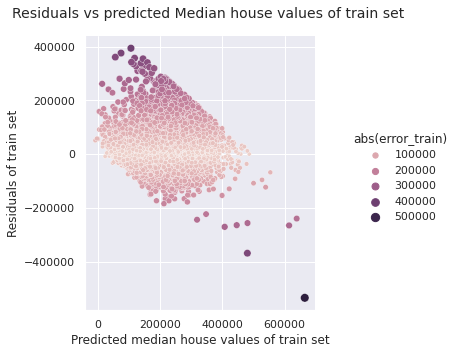

In [126]:
error_train = Y_train - y_train_predict
s = sns.relplot(x=y_train_predict, y=error_train,size=np.abs(error_train),hue=np.abs(error_train),legend=True);
s._legend.set_title('abs(error_train)')
s.set_axis_labels("Predicted median house values of train set","Residuals of train set")
s.fig.suptitle('Residuals vs predicted Median house values of train set', fontsize=14)
s.fig.subplots_adjust(top=.9);

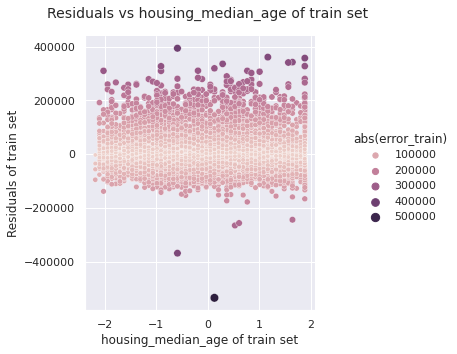

In [127]:

s = sns.relplot(x=X_train['housing_median_age'], y=error_train,size=np.abs(error_train),hue=np.abs(error_train),legend=True);
s._legend.set_title('abs(error_train)')
s.set_axis_labels("housing_median_age of train set","Residuals of train set")
s.fig.suptitle('Residuals vs housing_median_age of train set', fontsize=14)
s.fig.subplots_adjust(top=.9);

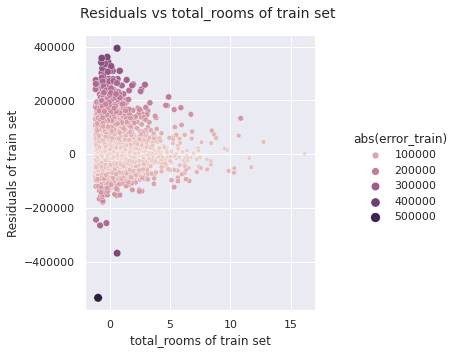

In [128]:

s = sns.relplot(x=X_train['total_rooms'], y=error_train,size=np.abs(error_train),hue=np.abs(error_train),legend=True);
s._legend.set_title('abs(error_train)')
s.set_axis_labels("total_rooms of train set","Residuals of train set")
s.fig.suptitle('Residuals vs total_rooms of train set', fontsize=14)
s.fig.subplots_adjust(top=.9);

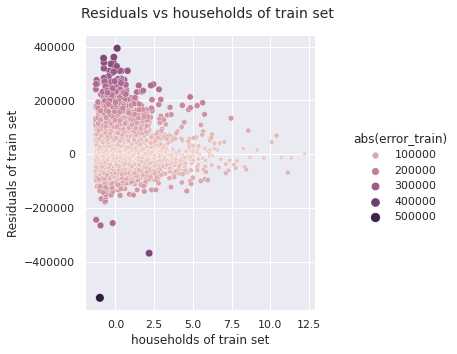

In [129]:

s = sns.relplot(x=X_train['households'], y=error_train,size=np.abs(error_train),hue=np.abs(error_train),legend=True);
s._legend.set_title('abs(error_train)')
s.set_axis_labels("households of train set","Residuals of train set")
s.fig.suptitle('Residuals vs households of train set', fontsize=14)
s.fig.subplots_adjust(top=.9);

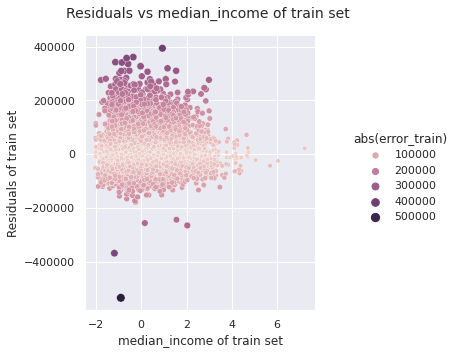

In [130]:

s = sns.relplot(x=X_train['median_income'], y=error_train,size=np.abs(error_train),hue=np.abs(error_train),legend=True);
s._legend.set_title('abs(error_train)')
s.set_axis_labels("median_income of train set","Residuals of train set")
s.fig.suptitle('Residuals vs median_income of train set', fontsize=14)
s.fig.subplots_adjust(top=.9);

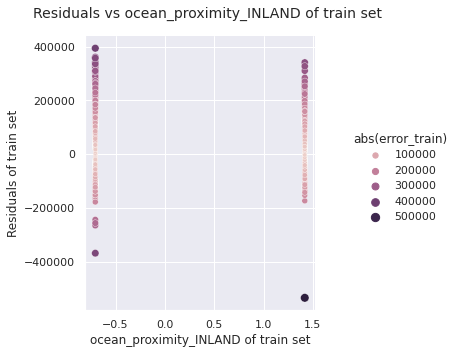

In [131]:

s = sns.relplot(x=X_train['ocean_proximity_INLAND'], y=error_train,size=np.abs(error_train),hue=np.abs(error_train),legend=True);
s._legend.set_title('abs(error_train)')
s.set_axis_labels("ocean_proximity_INLAND of train set","Residuals of train set")
s.fig.suptitle('Residuals vs ocean_proximity_INLAND of train set', fontsize=14)
s.fig.subplots_adjust(top=.9);

Apply the model on training and test datasets, report the diagnostic parameters.

In [132]:
y_test_predict = reg.predict(X_test)
rmse_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2_test = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))


The model performance for testing set
--------------------------------------
RMSE is 64745.550282224074
R2 score is 0.5581069535263399


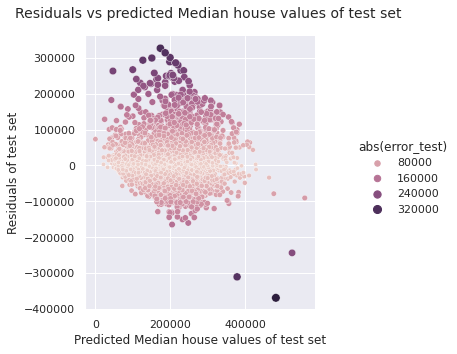

In [133]:
error_test = Y_test - y_test_predict
s = sns.relplot(x=y_test_predict, y=error_test,size=np.abs(error_test),hue=np.abs(error_test),legend=True);
s._legend.set_title('abs(error_test)')
s.set_axis_labels("Predicted Median house values of test set","Residuals of test set")
s.fig.suptitle('Residuals vs predicted Median house values of test set', fontsize=14)
s.fig.subplots_adjust(top=.9);

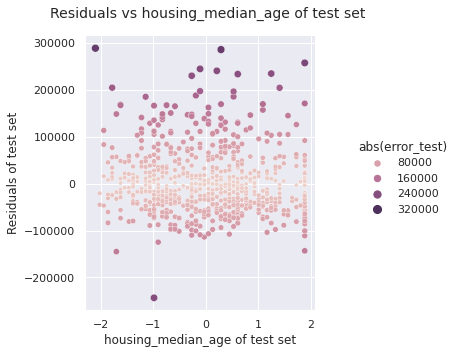

In [134]:

s = sns.relplot(x=X_test['housing_median_age'], y=error_test,size=np.abs(error_test),hue=np.abs(error_test),legend=True);
s._legend.set_title('abs(error_test)')
s.set_axis_labels("housing_median_age of test set","Residuals of test set")
s.fig.suptitle('Residuals vs housing_median_age of test set', fontsize=14)
s.fig.subplots_adjust(top=.9);

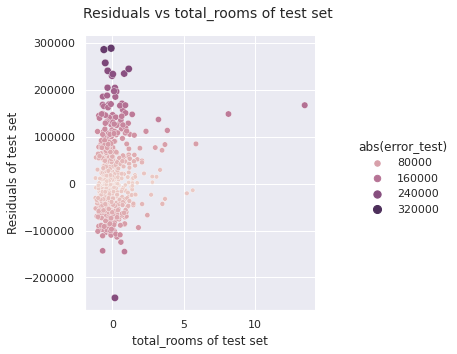

In [135]:

s = sns.relplot(x=X_test['total_rooms'], y=error_test,size=np.abs(error_test),hue=np.abs(error_test),legend=True);
s._legend.set_title('abs(error_test)')
s.set_axis_labels("total_rooms of test set","Residuals of test set")
s.fig.suptitle('Residuals vs total_rooms of test set', fontsize=14)
s.fig.subplots_adjust(top=.9);

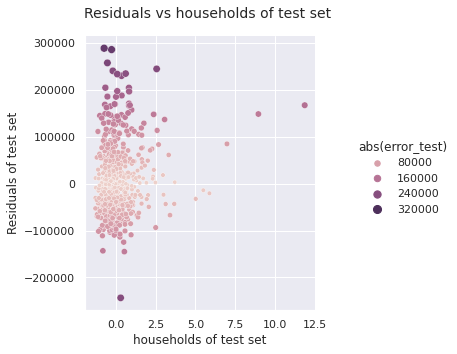

In [136]:

s = sns.relplot(x=X_test['households'], y=error_test,size=np.abs(error_test),hue=np.abs(error_test),legend=True);
s._legend.set_title('abs(error_test)')
s.set_axis_labels("households of test set","Residuals of test set")
s.fig.suptitle('Residuals vs households of test set', fontsize=14)
s.fig.subplots_adjust(top=.9);

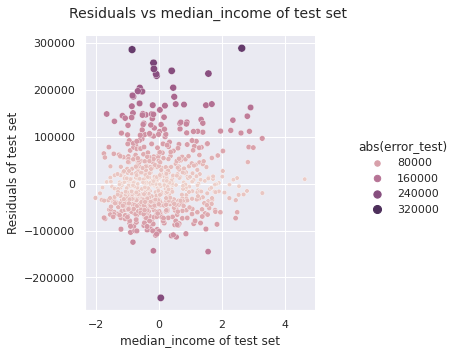

In [137]:

s = sns.relplot(x=X_test['median_income'], y=error_test,size=np.abs(error_test),hue=np.abs(error_test),legend=True);
s._legend.set_title('abs(error_test)')
s.set_axis_labels("median_income of test set","Residuals of test set")
s.fig.suptitle('Residuals vs median_income of test set', fontsize=14)
s.fig.subplots_adjust(top=.9);

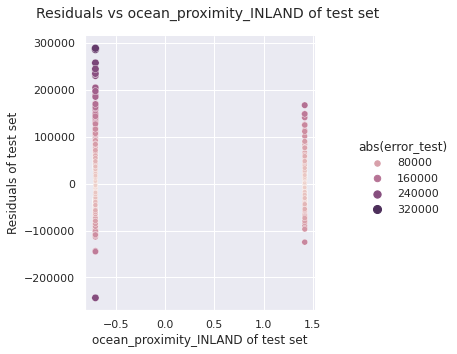

In [138]:

s = sns.relplot(x=X_test['ocean_proximity_INLAND'], y=error_test,size=np.abs(error_test),hue=np.abs(error_test),legend=True);
s._legend.set_title('abs(error_test)')
s.set_axis_labels("ocean_proximity_INLAND of test set","Residuals of test set")
s.fig.suptitle('Residuals vs ocean_proximity_INLAND of test set', fontsize=14)
s.fig.subplots_adjust(top=.9);

In [139]:
#print(labeled_weights)

In [140]:
#reg.coef_[0]

In [141]:
print("--------------------------------------")
print("--------------------------------------")
print(f'New Run with New parameters:')
print(f'Parameters used on the model: Loss Function "{loss_func}", Penalty function: "{pen_func}", alpha: "{pen_alph}", Max Iterations: "{M_iter}", Learning rate: "{lr}", Initial learning rate: "{ini_lr}"')
print("--------------------------------------")
print(f'Model equation: y_hat = ({reg.intercept_[0]})*intercept + ({reg.coef_[0]})*housing_median_age + ({reg.coef_[1]})*total_rooms + ({reg.coef_[2]})*households + ({reg.coef_[3]})*median_income + ({reg.coef_[4]})*ocean_proximity_INLAND' )
print("--------------------------------------")
print("The model performance for training set")
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("--------------------------------------")
print("The model performance for testing set")
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))


--------------------------------------
--------------------------------------
New Run with New parameters:
Parameters used on the model: Loss Function "squared_loss", Penalty function: "l1", alpha: "0.0001", Max Iterations: "150", Learning rate: "adaptive", Initial learning rate: "0.1"
--------------------------------------
Model equation: y_hat = (192352.9732205975)*intercept + (12431.441005985747)*housing_median_age + (-13644.026413561383)*total_rooms + (21082.164466225353)*households + (60785.87168355857)*median_income + (-31071.8637134103)*ocean_proximity_INLAND
--------------------------------------
The model performance for training set
RMSE is 64135.60722897425
R2 score is 0.5697304087605428
--------------------------------------
The model performance for testing set
RMSE is 64745.550282224074
R2 score is 0.5581069535263399
